In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.shape

(891, 15)

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df['age'].fillna(df['age'].median(),inplace=True)

/tmp/ipython-input-2790788646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)


In [ ]:
df=df.drop(df[['embark_town','deck']],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    889 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    object  
 12  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.5+ KB


In [ ]:
df.sex

,sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['sex']=le.fit_transform(df['sex'])

In [ ]:
df['sex']

,sex
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
df['embarked']=le.fit_transform(df['embarked'])

In [ ]:
df['embarked']

,embarked
0,2
1,0
2,2
3,2
4,2
...,...
886,2
887,2
888,2
889,0


In [ ]:
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [ ]:
df['who']=le.fit_transform (df['who'])

In [ ]:
df['alive']=le.fit_transform(df['alive'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    int64   
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    int64   
 8   class       891 non-null    category
 9   who         891 non-null    int64   
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    int64   
 12  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(8)
memory usage: 72.5 KB


In [ ]:
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [ ]:
df['class']=df['class'].replace(
    {
        'First':1,
        'Second':2,
        'Third':3
    }
)

/tmp/ipython-input-1820114228.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class']=df['class'].replace(
/tmp/ipython-input-1820114228.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['class']=df['class'].replace(


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    int64   
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    int64   
 8   class       891 non-null    category
 9   who         891 non-null    int64   
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    int64   
 12  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(8)
memory usage: 72.5 KB


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,3,1,True,0,False
1,1,1,0,38.0,1,0,71.2833,0,1,2,False,1,False
2,1,3,0,26.0,0,0,7.9250,2,3,2,False,1,True
3,1,1,0,35.0,1,0,53.1000,2,1,2,False,1,False
4,0,3,1,35.0,0,0,8.0500,2,3,1,True,0,True


In [ ]:
df=df.drop(df[['class','adult_male','alive']],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    int64  
 8   who       891 non-null    int64  
 9   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(7)
memory usage: 63.6 KB


In [ ]:
df.duplicated().sum()

np.int64(116)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  775 non-null    int64  
 1   pclass    775 non-null    int64  
 2   sex       775 non-null    int64  
 3   age       775 non-null    float64
 4   sibsp     775 non-null    int64  
 5   parch     775 non-null    int64  
 6   fare      775 non-null    float64
 7   embarked  775 non-null    int64  
 8   who       775 non-null    int64  
 9   alone     775 non-null    bool   
dtypes: bool(1), float64(2), int64(7)
memory usage: 61.3 KB


In [ ]:
corr=df.corr()
corr

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,alone
survived,1.000000,-0.331388,-0.516121,-0.078114,-0.037841,0.069864,0.247159,-0.151867,0.303976,-0.176714
pclass,-0.331388,1.000000,0.118507,-0.342745,0.087050,0.038998,-0.554649,0.174277,-0.206734,0.113778
sex,-0.516121,0.118507,1.000000,0.093574,-0.095574,-0.235116,-0.168979,0.092498,-0.623909,0.277339
age,-0.078114,-0.342745,0.093574,1.000000,-0.279316,-0.182697,0.092503,-0.020188,0.356505,0.190270
sibsp,-0.037841,0.087050,-0.095574,-0.279316,1.000000,0.379535,0.133807,0.063865,-0.198186,-0.607809
parch,0.069864,0.038998,-0.235116,-0.182697,0.379535,1.000000,0.190823,0.043590,-0.068818,-0.569387
fare,0.247159,-0.554649,-0.168979,0.092503,0.133807,0.190823,1.000000,-0.233776,0.144406,-0.245168
embarked,-0.151867,0.174277,0.092498,-0.020188,0.063865,0.043590,-0.233776,1.000000,-0.058528,0.062325
who,0.303976,-0.206734,-0.623909,0.356505,-0.198186,-0.068818,0.144406,-0.058528,1.000000,0.030629
alone,-0.176714,0.113778,0.277339,0.190270,-0.607809,-0.569387,-0.245168,0.062325,0.030629,1.000000


<Axes: >

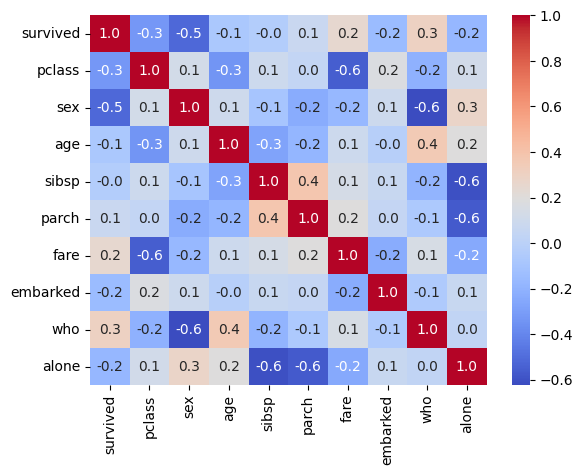

In [ ]:
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.1f')


<Axes: >

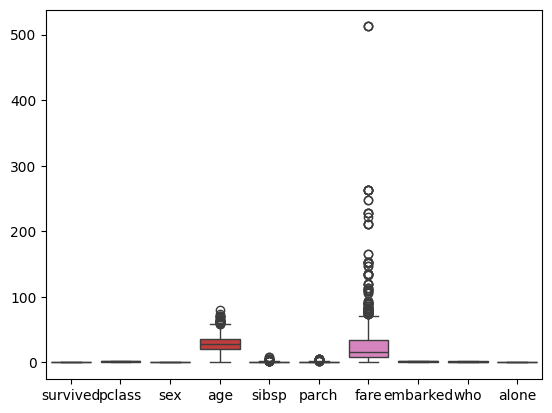

In [ ]:
sns.boxplot(df)

In [ ]:
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1
df=df[(df['age']>=Q1-1.5*IQR)& (df['age']<=Q3+1.5*IQR)]


<Axes: >

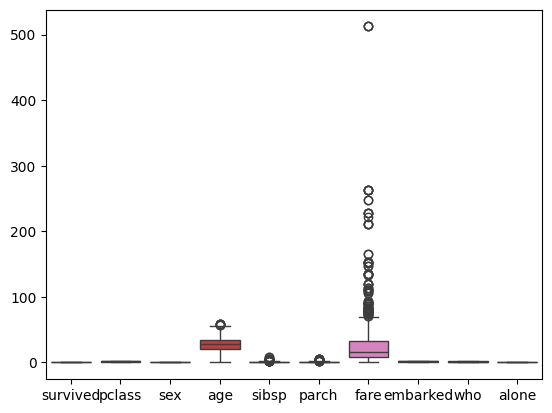

In [ ]:
sns.boxplot(df)

In [ ]:
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1
df=df[(df['fare']>=Q1-1.5*IQR)& (df['fare']<=Q3+1.5*IQR)]


<Axes: >

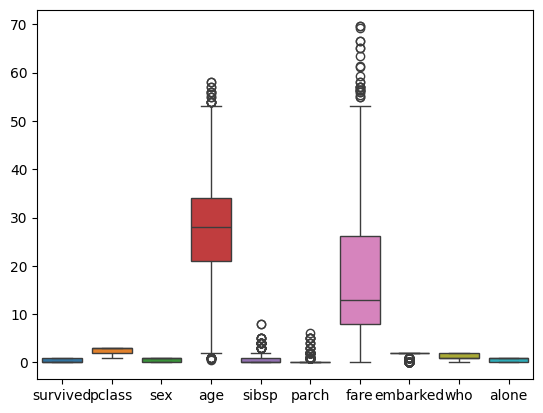

In [ ]:
sns.boxplot(df)

In [ ]:
df['Familysize']=df['sibsp']+df['parch'] + 1

/tmp/ipython-input-1392285012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Familysize']=df['sibsp']+df['parch'] + 1


In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,alone,Familysize
0,0,3,1,22.0,1,0,7.2500,2,1,False,2
2,1,3,0,26.0,0,0,7.9250,2,2,True,1
3,1,1,0,35.0,1,0,53.1000,2,2,False,2
4,0,3,1,35.0,0,0,8.0500,2,1,True,1
5,0,3,1,28.0,0,0,8.4583,1,1,True,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1,2,False,6
887,1,1,0,19.0,0,0,30.0000,2,2,True,1
888,0,3,0,28.0,1,2,23.4500,2,2,False,4
889,1,1,1,26.0,0,0,30.0000,0,1,True,1
